<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys

sys.path.append('../code')

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

from preprocessing import *
from config import *
from models import *
from utils import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
# data
data_regular = pd.read_csv('../dataset/Regular_Season_Batter.csv', index_col=0)
data_regular = data_regular[data_regular.year >= 2001].copy()
data_regular = data_regular[data_regular.AB >= 10].copy()

# features
config = Config()
print('target2: ', config.target2)

target2:  ['OBP', 'SLG']


In [3]:
# data split
x_train_obp, y_train_obp, x_val_obp, y_val_obp, x_test_obp, y_test_obp = split_data(data_regular, config, config.target2[0])

## BABIP and BABIP_AVG
## diff BABIP
## corrected OPS
## Add 1B


100%|██████████████████████████████████| 22/22 [00:51<00:00,  2.34s/it]


## lag_n


100%|██████████████████████████████████| 15/15 [00:38<00:00,  2.57s/it]


## total
## split_position
## fill position
## fill na height/weight
## height/weight
## age
## starting_salary
## cum_season
## OPS_up_down
## OBP_up_down
## SLG_up_down
## grad_status
## career_count
## from inter
## dummy variables
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 70 columns):
AB                     2105 non-null int64
OBP                    2105 non-null float64
starting_salary        2105 non-null float64
year                   2105 non-null int64
G                      2105 non-null int64
lag_1_H                1594 non-null float64
lag_1_HBP              1594 non-null float64
lag_1_2B               1594 non-null float64
lag_1_HR               1594 non-null float64
lag_1_SO               1594 non-null float64
lag_1_R                1594 non-null float64
lag_1_RBI              1594 non-null float64
lag_1_AB               1594 non-null float64
lag_1_BB               1594 non-null float64
lag_1_avg              1594 non-nu

In [4]:
# model
xgboost_obp = Xgboost_Run(config.params)

print('## OBP')
prob_obp = xgboost_obp.run([x_train_obp, y_train_obp], [x_val_obp, y_val_obp], [x_test_obp, y_test_obp], config.target2[0])

## OBP
[0]	validation_0-rmse:0.175896	validation_1-rmse:0.175537
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.056354	validation_1-rmse:0.063315
[100]	validation_0-rmse:0.050418	validation_1-rmse:0.063727
[150]	validation_0-rmse:0.046838	validation_1-rmse:0.064724
Stopping. Best iteration:
[54]	validation_0-rmse:0.055781	validation_1-rmse:0.063222

test WRMSE: 0.039315
test RMSE: 0.063853


In [5]:
f_score_gain = xgboost_obp.model.get_booster().get_score(importance_type='gain')
f_score_weight = xgboost_obp.model.get_booster().get_score(importance_type='weight')
f_score_cover = xgboost_obp.model.get_booster().get_score(importance_type='cover')
gain_df = pd.DataFrame({'features':list(f_score_gain.keys()), 'importance':list(f_score_gain.values())})
weight_df = pd.DataFrame({'features':list(f_score_weight.keys()), 'importance':list(f_score_weight.values())})
cover_df = pd.DataFrame({'features':list(f_score_cover.keys()), 'importance':list(f_score_cover.values())})
gain_df = gain_df.sort_values(by='importance', ascending=False)
weight_df = weight_df.sort_values(by='importance', ascending=False)
cover_df = cover_df.sort_values(by='importance', ascending=False)

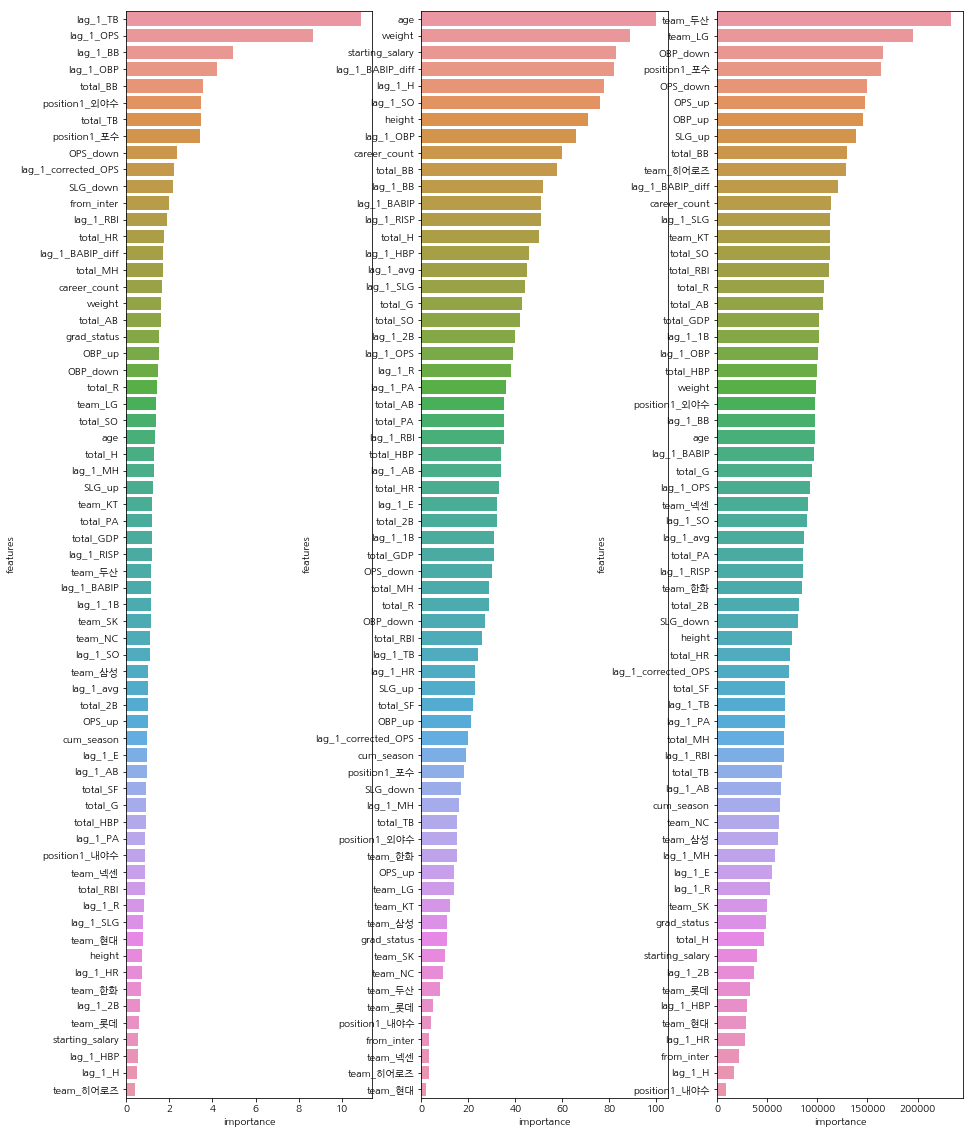

In [6]:
f, ax = plt.subplots(1,3, figsize=(15,20))
sns.barplot(x='importance', y='features', data=gain_df, ax=ax[0])
sns.barplot(x='importance', y='features', data=weight_df, ax=ax[1])
sns.barplot(x='importance', y='features', data=cover_df, ax=ax[2])

In [7]:
x_train_slg, y_train_slg, x_val_slg, y_val_slg, x_test_slg, y_test_slg = split_data(data_regular, config, config.target2[1])

# model
xgboost_slg = Xgboost_Run(config.params)

print('## SLG')
prob_slg = xgboost_slg.run([x_train_slg, y_train_slg], [x_val_slg, y_val_slg], [x_test_slg, y_test_slg], config.target2[1])

## BABIP and BABIP_AVG
## diff BABIP
## corrected OPS
## Add 1B


100%|██████████████████████████████████| 22/22 [00:51<00:00,  2.35s/it]


## lag_n


100%|██████████████████████████████████| 15/15 [00:38<00:00,  2.57s/it]


## total
## split_position
## fill position
## fill na height/weight
## height/weight
## age
## starting_salary
## cum_season
## OPS_up_down
## OBP_up_down
## SLG_up_down
## grad_status
## career_count
## from inter
## dummy variables
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 70 columns):
AB                     2105 non-null int64
SLG                    2105 non-null float64
starting_salary        2105 non-null float64
year                   2105 non-null int64
G                      2105 non-null int64
lag_1_H                1594 non-null float64
lag_1_HBP              1594 non-null float64
lag_1_2B               1594 non-null float64
lag_1_HR               1594 non-null float64
lag_1_SO               1594 non-null float64
lag_1_R                1594 non-null float64
lag_1_RBI              1594 non-null float64
lag_1_AB               1594 non-null float64
lag_1_BB               1594 non-null float64
lag_1_avg              1594 non-nu

In [8]:
f_score_gain = xgboost_slg.model.get_booster().get_score(importance_type='gain')
f_score_weight = xgboost_slg.model.get_booster().get_score(importance_type='weight')
f_score_cover = xgboost_slg.model.get_booster().get_score(importance_type='cover')
gain_df = pd.DataFrame({'features':list(f_score_gain.keys()), 'importance':list(f_score_gain.values())})
weight_df = pd.DataFrame({'features':list(f_score_weight.keys()), 'importance':list(f_score_weight.values())})
cover_df = pd.DataFrame({'features':list(f_score_cover.keys()), 'importance':list(f_score_cover.values())})
gain_df = gain_df.sort_values(by='importance', ascending=False)
weight_df = weight_df.sort_values(by='importance', ascending=False)
cover_df = cover_df.sort_values(by='importance', ascending=False)

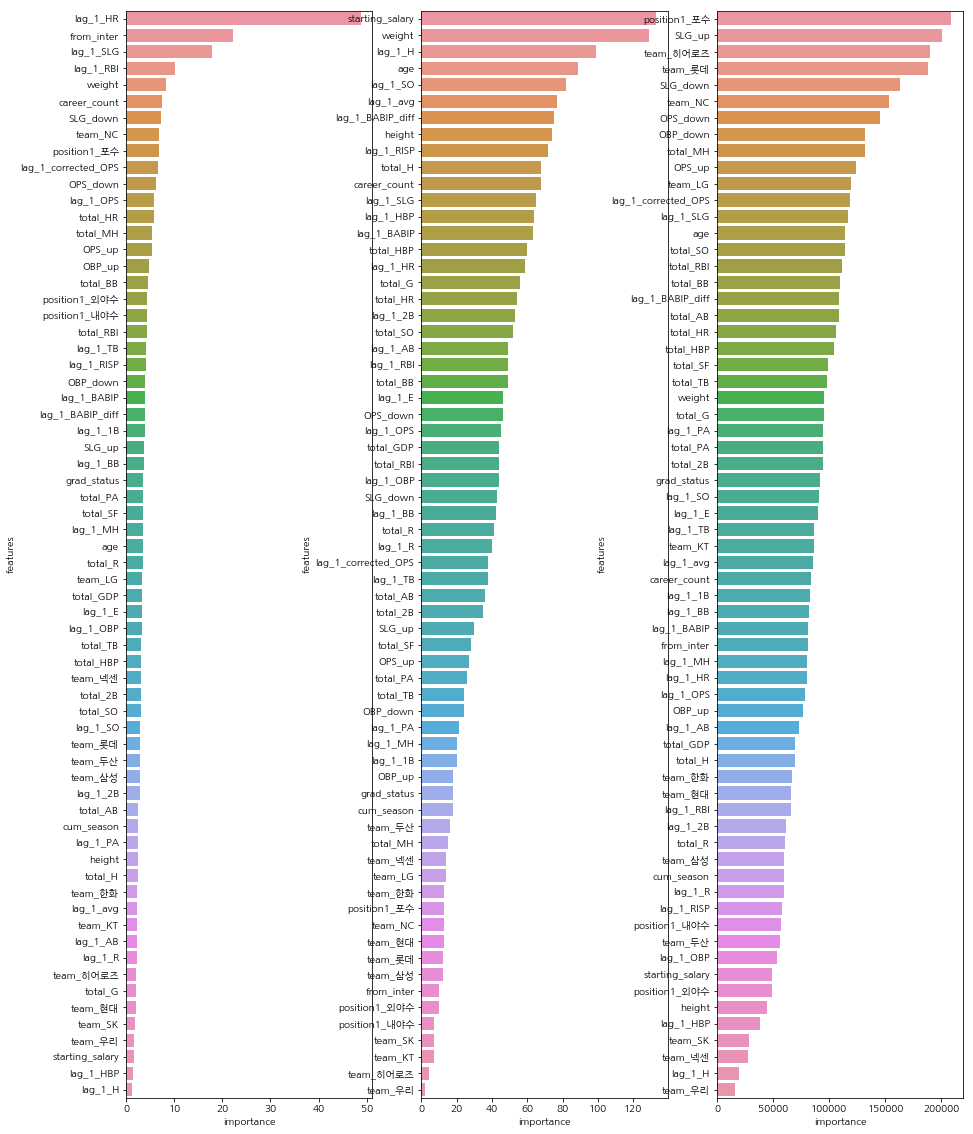

In [9]:
f, ax = plt.subplots(1,3, figsize=(15,20))
sns.barplot(x='importance', y='features', data=gain_df, ax=ax[0])
sns.barplot(x='importance', y='features', data=weight_df, ax=ax[1])
sns.barplot(x='importance', y='features', data=cover_df, ax=ax[2])

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test = split_data(data_regular, config, config.target)

## BABIP and BABIP_AVG
## diff BABIP
## corrected OPS
## Add 1B


100%|██████████████████████████████████| 22/22 [00:51<00:00,  2.35s/it]


## lag_n


100%|██████████████████████████████████| 15/15 [00:38<00:00,  2.57s/it]


## total
## split_position
## fill position
## fill na height/weight
## height/weight
## age
## starting_salary
## cum_season
## OPS_up_down
## OBP_up_down
## SLG_up_down
## grad_status
## career_count
## from inter
## dummy variables
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 70 columns):
AB                     2105 non-null int64
starting_salary        2105 non-null float64
OPS                    2105 non-null float64
year                   2105 non-null int64
G                      2105 non-null int64
lag_1_H                1594 non-null float64
lag_1_HBP              1594 non-null float64
lag_1_2B               1594 non-null float64
lag_1_HR               1594 non-null float64
lag_1_SO               1594 non-null float64
lag_1_R                1594 non-null float64
lag_1_RBI              1594 non-null float64
lag_1_AB               1594 non-null float64
lag_1_BB               1594 non-null float64
lag_1_avg              1594 non-nu

In [11]:
prob = prob_obp + prob_slg
e = wrmse(y_test.iloc[:,0], prob, y_test.iloc[:,1])
e2 = rmse(y_test.iloc[:, 0], prob)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.098058
test RMSE: 0.144112


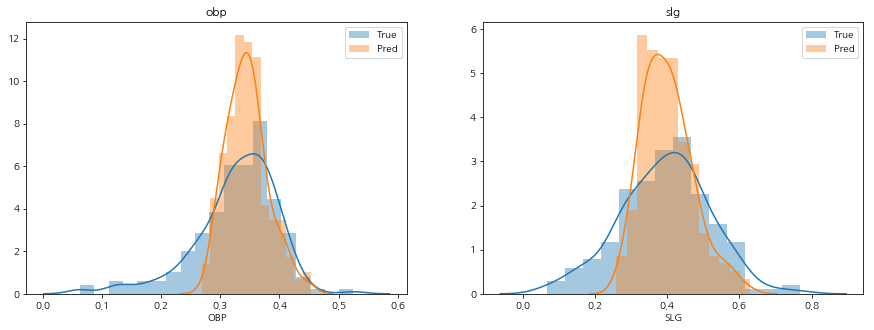

In [12]:
f, ax = plt.subplots(1,2,figsize=(15,5))

sns.distplot(y_test_obp.OBP, label='True', ax=ax[0])
sns.distplot(prob_obp, label='Pred', ax=ax[0])
ax[0].set_title('obp')
ax[0].legend()

sns.distplot(y_test_slg.SLG, label='True', ax=ax[1])
sns.distplot(prob_slg, label='Pred', ax=ax[1])
ax[1].set_title('slg')
ax[1].legend()

In [13]:
print('true mean: ',y_test_slg.SLG.mean())
print('true std: ',y_test_slg.SLG.std())
print('pred mean: ',prob_slg.mean())
print('pred std: ',prob_slg.std())

true mean:  0.3938719211822662
true std:  0.1235693710237358
pred mean:  0.4011514
pred std:  0.07094223


In [14]:
print('true mean: ',y_test_obp.OBP.mean())
print('true std: ',y_test_obp.OBP.std())
print('pred mean: ',prob_obp.mean())
print('pred std: ',prob_obp.std())

true mean:  0.32727093596059126
true std:  0.07011673782612159
pred mean:  0.3453127
pred std:  0.035031885
